In [2]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [145]:
data = pd.read_csv('SubgroupHM.csv', index_col=[0,1])

In [210]:
max_ = 0
for i in range(5):
    for j in range(3):
        v = len(data.loc[i+1, j+1])
        if v > max_: max_ = v 
max_

20

In [225]:
obs = np.empty((20, 5, 3))
for i in range(5):
    for j in range(3):
        line = np.empty(20)
        max_ = len(data.loc[i+1, j+1])
        for k in range(max_):
            line[k] = data.loc[i+1,j+1].values[k]
        for k in range(max_, 20):
            line[k] = np.NaN
        obs[:, i, j] = line
        
mask_obs = np.ma.masked_invalid(obs)

In [187]:
fakedata = np.random.normal(10, 5, size=(10, 5, 3))

array([[ 5.48009552, 13.51738042, 12.89441296],
       [ 8.40864118, 11.41992009, 11.33624186],
       [12.89820902,  1.39180399,  2.96624273],
       [ 7.49254849,  0.73257838,  9.229742  ],
       [ 9.70469794, 11.05881661,  9.60780032]])

In [228]:
with pm.Model() as group_model:
    sigma = pm.HalfCauchy('sigma', 10)
    sigma_b = pm.HalfCauchy('sigma_b', 10)
    sigma_c = pm.HalfCauchy('sigma_c', 10)
    alpha = pm.Normal('alpha', 0, sd=10)
    b_j = pm.Normal('b_j', 0, sd=sigma_b, shape=(5,1))
    c_jk = pm.Normal('c_jk', 0, sd=sigma_c, shape=(5,3))
    
    mu = alpha + b_j + c_jk
    
    y = pm.Normal('y', mu, sd=sigma, observed=mask_obs)

In [240]:
with group_model:
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/conda/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_missing, c_jk, b_j, alpha, sigma_c_log__, sigma_b_log__, sigma_log__]
100%|██████████| 2000/2000 [01:21<00:00, 24.54it/s]
The acceptance probability does not match the target. It is 0.8963658665656042, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


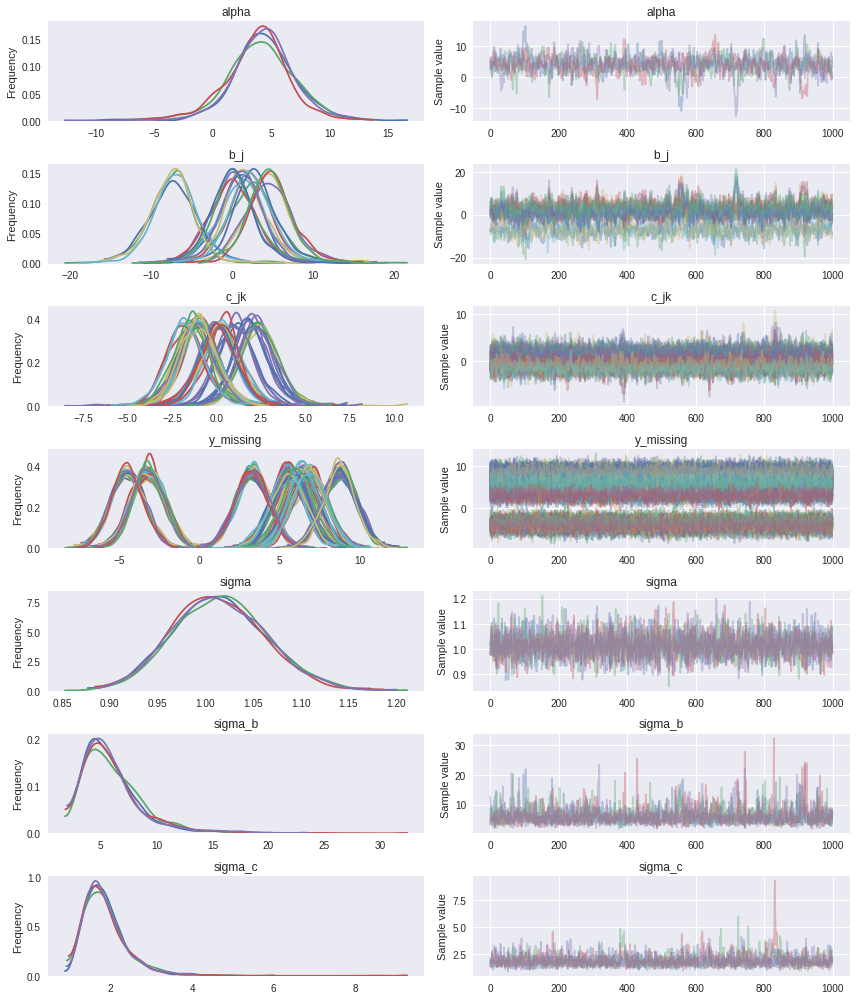

In [241]:
pm.traceplot(trace);

In [243]:
pm.summary(trace, ['b_j',])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
b_j__0_0,1.283474,3.007854,0.118103,-5.258724,6.878948,491.0,1.002019
b_j__1_0,-7.282052,3.038323,0.119331,-13.261108,-1.020494,508.0,1.001898
b_j__2_0,2.451908,3.085009,0.120756,-4.366863,8.339877,508.0,1.002978
b_j__3_0,0.139871,3.064589,0.121646,-6.197662,6.056329,510.0,1.002247
b_j__4_0,4.557692,3.022318,0.114574,-2.051708,9.939702,516.0,1.002361
